# Budget Analysis

---

## Environment Setup

In [1]:
# Initial Imports
import os
import plaid
import requests
import datetime
import json
import pandas as pd
from dotenv import load_dotenv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Helper functions

def pretty_print_response(response):
    """
    This function formats a JSON file to pretty printing it in the screen.
    """
    print(json.dumps(response, indent=4, sort_keys=True))

In [3]:
# Set environment variables from the .env file
load_dotenv()

True

In [4]:
# Extract API keys from environment variables
PLAID_CLIENT_ID = os.getenv("PLAID_CLIENT_ID")
# PLAID_SECRET = os.getenv("PLAID_SECRET")
PLAID_SBX_SECRET_KEY = os.getenv("PLAID_SBX_SECRET_KEY")
PLAID_PUBLIC_KEY = os.getenv("PLAID_PUBLIC_KEY")

---

## Plaid Access Token

In this section, you will use the `plaid-python` API to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:

1. Create a client to connect to plaid

2. Use the client to generate a public token and request the following items: ['transactions', 'income', 'assets']

3. Exchange the public token for an access token

4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [5]:
# Create the client object
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SBX_SECRET_KEY, public_key=PLAID_PUBLIC_KEY, environment='sandbox')

In [6]:
# Set the institution id
INSTITUTION_ID = "ins_109508"

### 2. Generate a public token

In [7]:
# Create the public token
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])
# Print the public token
create_tkn_response

{'public_token': 'public-sandbox-e018b6eb-03a4-48b7-93f5-a17ae9be0c30',
 'request_id': '5ZP9JWdY6xynTo9'}

### 3. Exchange the public token for an access token

In [8]:
# Retrieve the access token
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])
# Print the access toke
exchange_response

{'access_token': 'access-sandbox-084b280e-c4fc-4210-bc77-c34c741bef0e',
 'item_id': 'QDw7qPV8KvCnek676QyWfVpvRAW4zPupDoxbj',
 'request_id': 'EEXHLN7B3090ft0'}

In [9]:
# Store the access token in a Python variable
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [10]:
# Retrieve accounts
client.Accounts.get(access_token)
# Print accounts

{'accounts': [{'account_id': '8Eevryw53ailwE5v5VaXFAzq8wprkrswqnpg9',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'EDGnQlNP1oCjkvMbMgpPHroxl5EJmJuXbyerG',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'WDvpxq8bdlCdk7mBmz3LS38MPNlEVETlgRyXg',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days

2. Print the categories for each transaction type

3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)

4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [11]:
# Set the start and end date 90 days from today
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())
# Retrieve the transactions for the last 90 days
transactions_response = client.Transactions.get(access_token,start_date,end_date)
# Print the transactions
print(json.dumps(transactions_response['transactions'][:2],indent=4, sort_keys=True))

[
    {
        "account_id": "AE84PyQdeMiaKbMyMw8dC7DNXKVBlBU1z8Jad",
        "account_owner": null,
        "amount": 500,
        "authorized_date": null,
        "category": [
            "Food and Drink",
            "Restaurants"
        ],
        "category_id": "13005000",
        "date": "2020-05-25",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "name": "Tectra Inc",
        "payment_channel": "in store",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
        },
        "pending": false,
    

### 2. Print the categories for each transaction

In [12]:
# Create a for-loop to print the categories for each transaction
transaction_df = pd.DataFrame(columns=['category'])
transactions = transactions_response['transactions']
for index, transaction in enumerate(transactions):
    transaction_df.loc[index] = [transaction["category"][0]]
transaction_df


,category
0,Food and Drink
1,Payment
2,Food and Drink
3,Shops
4,Payment
5,Travel
6,Transfer
7,Transfer
8,Recreation
9,Travel


### 3. Create a new DataFrame using the following fields from the JSON transaction data: `date`, `name`, `amount`, `category`. 

(For categories with more than one label, just use the first category label in the list)

In [13]:
# Define an empty DataFrame and set the columns as date, name, amount, and category
transaction_df = pd.DataFrame(columns=['date', 'name', 'amount', 'category'])
# Retrieve all the transactions
transactions = transactions_response['transactions']
# Populate the transactions DataFrame with the transactions data
for index, transaction in enumerate(transactions):
    transaction_df.loc[index] = [transaction["date"], transaction["name"], transaction["amount"], transaction["category"][0]]
# Display sample data from the DataFrame    
transaction_df.head()

,date,name,amount,category
0,2020-05-25,Tectra Inc,500,Food and Drink
1,2020-05-24,AUTOMATIC PAYMENT - THANK,2078.5,Payment
2,2020-05-24,KFC,500,Food and Drink
3,2020-05-24,Madison Bicycle Shop,500,Shops
4,2020-05-15,CREDIT CARD 3333 PAYMENT *//,25,Payment


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [14]:
# Display data types
# Use the `dtypes` attribute to list the column data types
transaction_df.dtypes

date        object
name        object
amount      object
category    object
dtype: object

In [15]:
# Make any required data type transformation
# Convert column 'amount' to Float
transaction_df['amount'] = transaction_df['amount'].astype('float')
# Convert column 'date' to date format
transaction_df['date'] = pd.to_datetime(transaction_df['date'])
# transaction_df['date'].(parse_dates=True, infer_datetime_format=True)
transaction_df.dtypes

date        datetime64[ns]
name                object
amount             float64
category            object
dtype: object

In [16]:
# Set the date column as index
transaction_date_df = transaction_df
transaction_date_df = transaction_date_df.set_index('date')
# Display sample data
transaction_date_df.head()

,name,amount,category
date,,,
2020-05-25,Tectra Inc,500.0,Food and Drink
2020-05-24,AUTOMATIC PAYMENT - THANK,2078.5,Payment
2020-05-24,KFC,500.0,Food and Drink
2020-05-24,Madison Bicycle Shop,500.0,Shops
2020-05-15,CREDIT CARD 3333 PAYMENT *//,25.0,Payment


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:

1. Determine the previous year's gross income and print the results

2. Determine the current monthly income and print the results

3. Determine the projected yearly income and print the results

In [17]:
# Fetch de income data
income_response = client.Income.get(access_token)
# Print the income data
income_response

{'income': {'income_streams': [{'confidence': 0.99,
    'days': 690,
    'monthly_income': 500,
    'name': 'UNITED AIRLINES'}],
  'last_year_income': 6000,
  'last_year_income_before_tax': 7285,
  'max_number_of_overlapping_income_streams': 1,
  'number_of_income_streams': 1,
  'projected_yearly_income': 6085,
  'projected_yearly_income_before_tax': 7389},
 'request_id': 'bfPCjGRorVBiMEV'}

In [18]:
# Determine the previous year's gross income and print the results
print(income_response['income']['last_year_income_before_tax'])

7285


In [19]:
# Determine the current monthly income and print the results
print(income_response['income']['income_streams'][0]['monthly_income'])

500


In [20]:
# Determine the projected yearly income and print the results
print(income_response['income']['projected_yearly_income'])

6085


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)

2. Generate a bar chart with the number of transactions for each category

3. Calulate the expenses per month

4. Plot the total expenses per month

### Calculate the expenses per category

In [21]:
# Compute the total expenses per category
expenses_df = transaction_df.groupby('category').sum()
# Display the expenses per catefory
expenses_df

,amount
category,
Food and Drink,3817.19
Payment,6310.50
Recreation,235.50
Shops,1500.00
Transfer,20537.34
Travel,35.19


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E405071C88>],
      dtype=object)

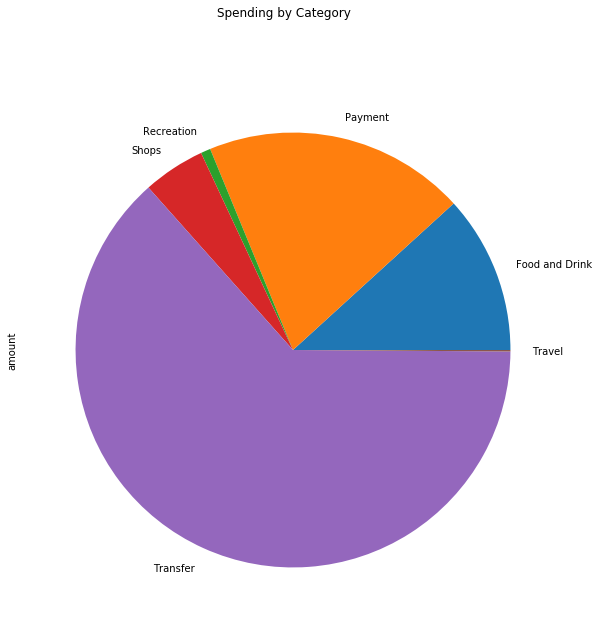

In [22]:
# Create a spending categories pie chart.
expenses_df.plot(kind='pie', figsize=(10,10), title='Spending by Category', subplots=True, legend=False)

### Calculate the expenses per month

In [23]:
# Create a DataFrame with the total expenses
expenses_df = transaction_df.groupby('name').sum()
# Display sample data
expenses_df

,amount
name,
ACH Electronic CreditGUSTO PAY 123456,17550.00
AUTOMATIC PAYMENT - THANK,6235.50
CD DEPOSIT .INITIAL.,3000.00
CREDIT CARD 3333 PAYMENT *//,75.00
INTRST PYMNT,-12.66
KFC,1500.00
Madison Bicycle Shop,1500.00
McDonald's,36.00
SparkFun,268.20


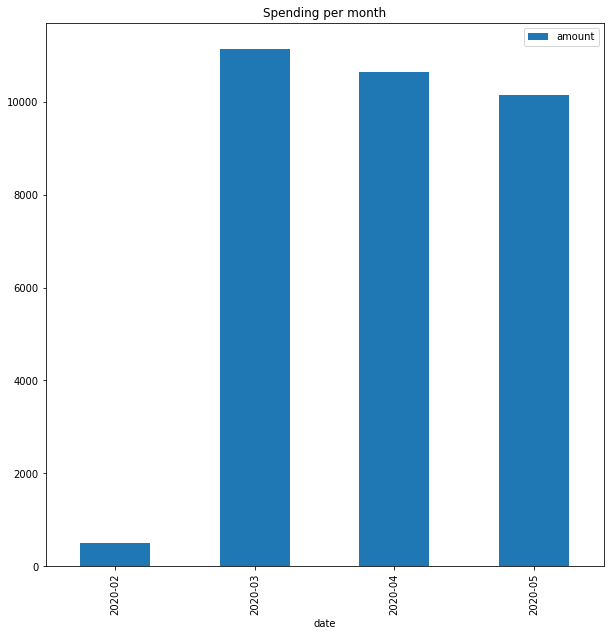

In [24]:
# Create a spending per month bar chart
monthly_spending_df = transaction_df
monthly_spending_df['date'] = monthly_spending_df['date'].dt.strftime('%Y-%m')
monthly_spending_df = monthly_spending_df.groupby('date').sum()
monthly_spending_df.plot(kind='bar', figsize=(10,10), title='Spending per month')
